# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import random
import math
import seaborn as sns
#!pip install phik
import phik
from phik import report

In [2]:
np.random.seed(0)

In [3]:
try:
    data = pd.read_csv('datasets/insurance.csv', sep=',')
except FileNotFoundError: 
    data = pd.read_csv('/datasets/insurance.csv', sep=',')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
X = data.drop('Страховые выплаты', axis=1).astype('int64')
y = data['Страховые выплаты']

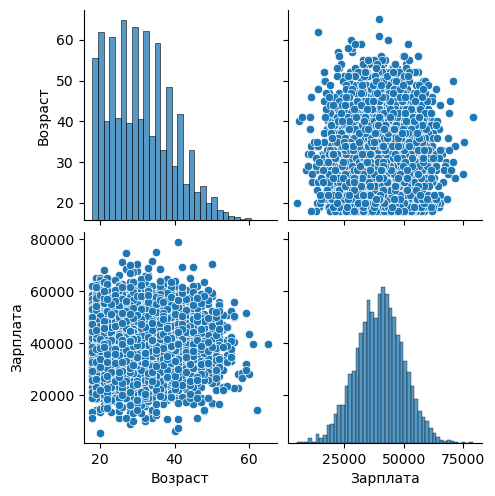

In [6]:
sns.pairplot(data[['Возраст', 'Зарплата']])

In [7]:
data['Страховые выплаты'].value_counts(normalize=True)

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: Страховые выплаты, dtype: float64

In [8]:
data['Пол'].value_counts(normalize=True)

0    0.501
1    0.499
Name: Пол, dtype: float64

In [9]:
data['Члены семьи'].value_counts(normalize=True)

1    0.3628
0    0.3026
2    0.2142
3    0.0878
4    0.0248
5    0.0064
6    0.0014
Name: Члены семьи, dtype: float64

In [10]:
report.correlation_report(data)

interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


(                        Пол   Возраст  Зарплата  Члены семьи  \
 Пол                1.000000  0.000000  0.000000          0.0   
 Возраст            0.000000  1.000000  0.071073          0.0   
 Зарплата           0.000000  0.071073  1.000000          0.0   
 Члены семьи        0.000000  0.000000  0.000000          1.0   
 Страховые выплаты  0.032181  0.884865  0.000000          0.0   
 
                    Страховые выплаты  
 Пол                         0.032181  
 Возраст                     0.884865  
 Зарплата                    0.000000  
 Члены семьи                 0.000000  
 Страховые выплаты           1.000000  ,
 array([[0.0697231 ],
        [0.88817198],
        [0.15285236],
        [0.        ],
        [0.88769209]]),
                          Пол     Возраст    Зарплата  Члены семьи  \
 Пол                83.017464   -1.185969   -0.842571    -0.446617   
 Возраст            -1.185969  135.524763    1.294698    -0.298855   
 Зарплата           -0.842571    1.294698  12

In [11]:
data[['Возраст', 'Страховые выплаты']].corr(method='spearman')

,Возраст,Страховые выплаты
Возраст,1.000000,0.548589
Страховые выплаты,0.548589,1.000000


* Хотя бы 1 раз страховые выплаты получили ~11.3% клиентов.
* Корреляция (по коэффициенту Фик - положительная) количества выплат только с возрастом . Пол, количество членов семьи и зарплата не оказывают существенного влияния (видно по  коэффициентам $Ф_к$ и значимости признаков).
* Сильной корреляции между признаками не выявлено, значит можно их использовать в модели, основанной на линейной регрессии.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не повлияет на линейную регрессию.

**Обоснование:** Предположим, что предсказания равны: $$a_1 = a_2$$ 

Запишем формулу вектора весов для 2 случая: $$w_2 = ((XP)^T(XP))^{-1}(XP)^Ty = (P^TX^TXP)^{-1}P^TX^Ty = P^{-1}(P^TX^TX)^{-1}P^TX^Ty = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty = P^{-1}(X^TX)^{-1}X^Ty = P^{-1}w_1  $$

Подставим веса в формулу для предсказаний и составим равенство:
$$ X w_1y = (X P) P^{-1}w_1  y$$
$$ y =  y $$

Верно, отсюда: $$a_1 = a_2$$

Соотношение весов: $$w_2 =  P^{-1} w_1 $$

## Алгоритм преобразования

**Алгоритм**

1. Шифрование умножением матрицы признаков X на случайную обратимую матрицу P.
2. Расшифровка умножением на обратную случайной матрицу ($P^{-1}$).
3. ???
4. Profit

**Обоснование**
* Случайная матрица P является ключом шифрования, который не влияет на предсказания модели, основанной на линейной регрессии (доказано выше).
* Восстановить исходные данные можно применив ключ дешифровки в виде обратной к случайной матрице P.

## Проверка алгоритма

### Исходная матрица признаков

In [12]:
model = LinearRegression()
model.fit(X, y)
predict_origin = model.predict(X)
print (f'R2 для исходной матрицы: {model.score(X, y):.4f}')
print (f'Веса для исходной матрицы: {model.coef_}')

R2 для исходной матрицы: 0.4249
Веса для исходной матрицы: [ 7.92580563e-03  3.57083050e-02 -1.70081903e-07 -1.35676627e-02]


### Cоздаем случайную матрицу

In [13]:
P = np.random.rand(X.shape[1], X.shape[1])
pd.DataFrame(P)

,0,1,2,3
0,0.548814,0.715189,0.602763,0.544883
1,0.423655,0.645894,0.437587,0.891773
2,0.963663,0.383442,0.791725,0.528895
3,0.568045,0.925597,0.071036,0.087129


### Проверяем на обратимость

In [14]:
pd.DataFrame(np.linalg.inv(P))

,0,1,2,3
0,-2.936611,0.624528,1.792697,1.090603
1,1.664284,-0.430683,-1.077603,0.541375
2,3.929769,-1.950088,-0.519949,-1.460257
3,-1.738625,2.093497,0.183966,-0.193682


### Преобразуем исходную матрицу признаков

In [15]:
XP = np.dot(X, P)
pd.DataFrame(XP, columns=X.columns)

,Пол,Возраст,Зарплата,Члены семьи
0,47816.159626,19046.821778,39288.176764,26270.382725
1,36639.241064,14601.414441,30105.751495,20139.115638
2,20249.203960,8071.002825,16638.915829,11132.654732
3,40194.769953,16004.926305,33024.265492,22073.819645
4,25164.009197,10026.623866,20676.878699,13829.671933
...,...,...,...,...
4995,34415.758973,13708.798451,28276.978374,18906.692538
4996,50510.900958,20115.221583,41501.340997,27744.501206
4997,32677.776766,13013.436564,26848.372607,17947.547498
4998,31523.345621,12556.239315,25899.851536,17315.289153


### Проверяем модель

In [16]:
model.fit(XP, y)
predict_convert = model.predict(XP)
print (f'R2 для преобразованной матрицы: {model.score(XP, y):.4f}')
print (f'Веса для преобразованной матрицы: {model.coef_}')

R2 для преобразованной матрицы: 0.4249
Веса для преобразованной матрицы: [-0.01577139 -0.00953317 -0.01867538  0.06360302]


In [17]:
print(f'R2 между предсказаниями: {r2_score(predict_origin, predict_convert)}')
print(f'RMSE между предсказаниями: {(mean_absolute_error(predict_origin, predict_convert))**0.5}')

R2 между предсказаниями: 1.0
RMSE между предсказаниями: 1.5335025854153966e-06


### С целью проверки, восстановим исходную матрицу

In [18]:
X_ = np.dot(XP, np.linalg.inv(P))
X_ = pd.DataFrame(X_, columns=X.columns).round().astype('int64')
X_

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0
...,...,...,...,...
4995,0,28,35700,2
4996,0,34,52400,1
4997,0,20,33900,2
4998,1,22,32700,3


### Проверим на совпадение с исходной матрицей

In [19]:
distances = np.array([math.dist(X_[col], X[col]) for col in X_])
print (f'Среднее Евклидово расстояние между векторами матриц: {distances.mean()}')
print (f'Разных элементов в матрицах: {(X_ != X).sum().sum()}')

Среднее Евклидово расстояние между векторами матриц: 0.0
Разных элементов в матрицах: 0


### Выводы:
* Выбранная метрика качества не изменилась.
* Веса отличаются, как и предсказывала теория.
* Предсказания модели для исходной и преобразованной матрицы признаков, с высокой степенью точности, практически совпадают.
* Восстановленая матрица совпадает с исходной, данные не искажены.